# Importing important libraries

In [29]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [30]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

In [31]:
x = np.array(x)
y = np.array(y)

In [32]:
y = y.astype('int')

In [33]:
x.shape

(70000, 784)

In [34]:
y.shape

(70000,)

In [35]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [36]:
x_train.shape

(60000, 784)

In [37]:
y_train.shape

(60000,)

In [38]:
y_test.shape

(10000,)

# Data Visualisation

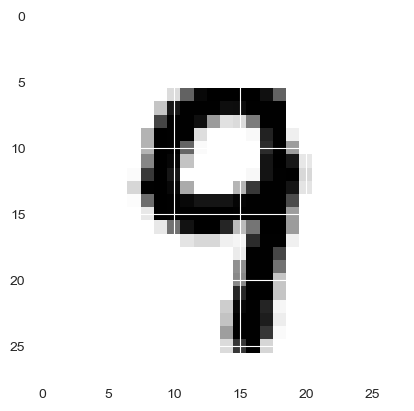

In [39]:
some_image = x[520]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

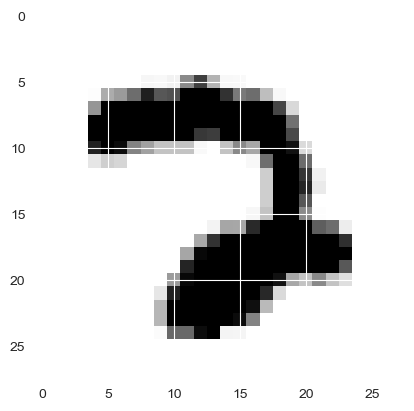

In [40]:
some_image = x[120]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

# Bagging algorithm

In [41]:
def bagging():
  
  indexes = np.random.randint(0, len(x_train), len(x_train))
  bag = x_train[indexes]
  target = y_train[indexes]
  return (bag,target)


## Bag 1

In [42]:
bag1 = bagging()
print(bag1[0].shape,'\n', bag1[1].shape)

(60000, 784) 
 (60000,)


In [43]:
# Task 1: Train the Bag 1 using a Decision Tree Classifier DTC1
dtc1 = DecisionTreeClassifier()
dtc1.fit(bag1[0], bag1[1])

DecisionTreeClassifier()

# Bag 2

In [44]:
bag2 = bagging()
print(bag2[0].shape,'\n', bag2[1].shape)

(60000, 784) 
 (60000,)


In [45]:
# Task 2: Train the Bag 2 using a Decision Tree Classifier DTC2
dtc2 = DecisionTreeClassifier()
dtc2.fit(bag2[0], bag2[1])

DecisionTreeClassifier()

## Bag 3

In [46]:
bag3 = bagging()
print(bag3[0].shape,'\n', bag3[1].shape)

(60000, 784) 
 (60000,)


In [47]:
# Task 3: Train the Bag 2 using a Decision Tree Classifier DTC3
dtc3 = DecisionTreeClassifier()
dtc3.fit(bag3[0], bag3[1])

DecisionTreeClassifier()

# Combining the result of all 3 classifiers

In [48]:
pred_1 = dtc1.predict(x_test)
pred_2 = dtc2.predict(x_test)
pred_3 = dtc3.predict(x_test)

# Majority voting

In [49]:
y_pred = []

for i in range(len(x_test)):
  
  node = [pred_1[i], pred_2[i], pred_3[i]]
  majority_vote = max( node , key = node.count)
  y_pred.append(majority_vote)

y_pred = np.array(y_pred)

In [50]:
y_pred.shape

(10000,)

In [51]:
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [52]:
# Task 4: Obtain the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Bagging accuracy:', accuracy)

Bagging accuracy: 0.9084


# Plotting the confusion matrix ,
# confusion matrix gives the classwise accuracy

In [53]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size': 8})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

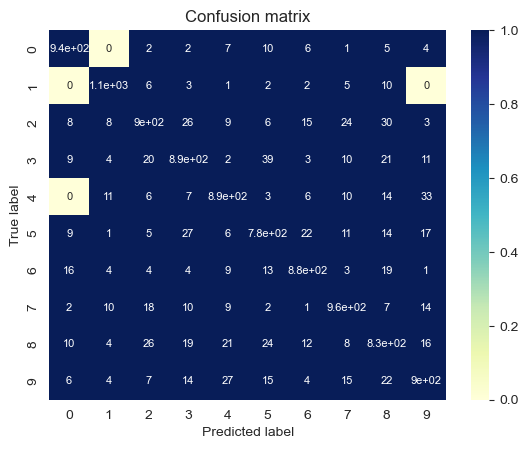

In [54]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
# Task 5: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=range(10))
plt.show()